## Observations and Insights 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = mouse_metadata.merge(study_results, on='Mouse ID')

new_merged1 = merged.set_index('Mouse ID')#used to get duplicate ID and drop duplicate w/ drop

new_merged = merged.set_index('Mouse ID')

new_merged = new_merged.drop_duplicates()
new_merged

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [4]:
# Checking the number of mice in the DataFrame.
unique_mouses = pd.unique(new_merged.index)
number_mouses = len(unique_mouses)
print(f'There are {number_mouses} mice in this dataset.')

There are 248 mice in this dataset.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#diff_df = merged.merge(new_merged, how='outer', indicator='Exist')
#diff_df = diff_df.loc[diff_df['Mouse ID'] != 'both']


duplicate = pd.concat([new_merged, new_merged1]).loc[new_merged.index.symmetric_difference(new_merged1.index)]
duplicate

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
d133,Zoniferol,Male,5,30,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
d133,Zoniferol,Male,5,30,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = new_merged1.drop(index = 'd133')
cleaned_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(cleaned_df.index))

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stat_df = cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})

'''
stat_df['mean'] = stat_df['Tumor Volume (mm3)'].mean()
stat_df['median'] = stat_df['Tumor Volume (mm3)'].median()
stat_df['var'] = stat_df['Tumor Volume (mm3)'].var()
stat_df['std'] = stat_df['Tumor Volume (mm3)'].std()
stat_df['sem'] = stat_df['Tumor Volume (mm3)'].sem()
'''
stat_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.282012  51.826638  48.424014  6.958737  0.517239

## Bar Plots

Text(0, 0.5, 'Number of Data Points')

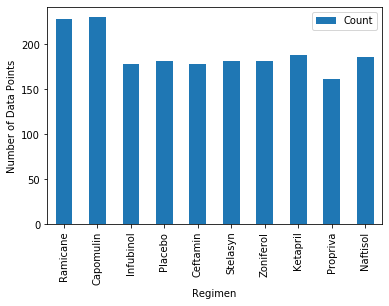

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
x_axis = cleaned_df['Drug Regimen'].unique()
count = cleaned_df['Drug Regimen'].value_counts()

plotdata = pd.DataFrame({"Count": count}, index=x_axis)



plotdata.plot(kind='bar')
plt.xlabel("Regimen")
plt.ylabel("Number of Data Points")

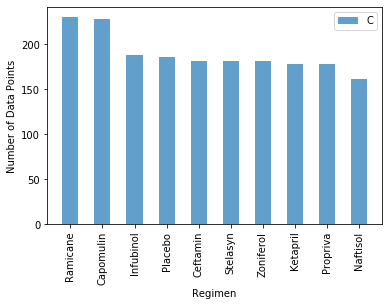

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(x_axis, count,width = .5, alpha = .7, align='center')

plt.xticks(rotation='vertical')

plt.xlabel("Regimen")
plt.ylabel("Number of Data Points")
plt.legend('Count')

## Pie Plots

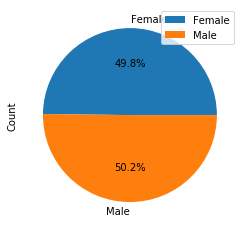

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleaned_df1 = merged.groupby(['Sex'])
gender_count = cleaned_df1['Mouse ID'].unique()

gender_count1 = gender_count.str.len()
#total_unique = gender_count1.sum()

labels = ['Female', 'Male']


pie_df = pd.DataFrame({'Count': gender_count1},
                  index=labels)
plot = pie_df.plot.pie(y='Count', autopct='%1.1f%%')
plot
#print(gender_count.count())

Text(0, 0.5, 'Count')

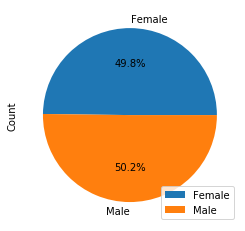

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



plt.pie(gender_count1.values, labels=labels, autopct="%1.1f%%")
plt.legend(labels, loc="lower right")
plt.ylabel("Count")

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
volume = cleaned_df.groupby(['Drug Regimen'])

volume_summary = volume['Tumor Volume (mm3)'].sum()

quartiles = volume_summary.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'IQR = {iqr}')
volume_summary

IQR = 450.2970312574962


Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      8423.930878
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9644.044192
Name: Tumor Volume (mm3), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1df45c61c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1df45c61e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df45c54d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1df45c67e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df45c67e88>],
 'means': []}

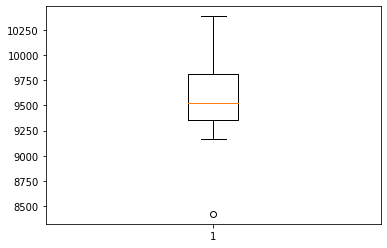

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
print()

plt.boxplot(volume['Tumor Volume (mm3)'].sum())

## Line and Scatter Plots

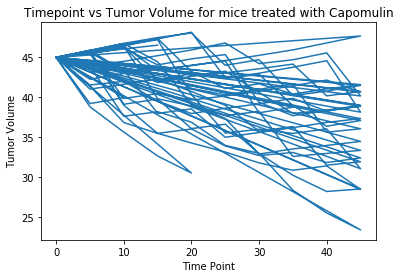

In [104]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_point = merged['Timepoint']
merged = merged.rename(columns={"Drug Regimen":'DrugRegimen'})
capomulin = merged.loc[merged.DrugRegimen=='Capomulin']
plt.title("Timepoint vs Tumor Volume for mice treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'])



Text(0, 0.5, 'Tumor Volume (mm3)')

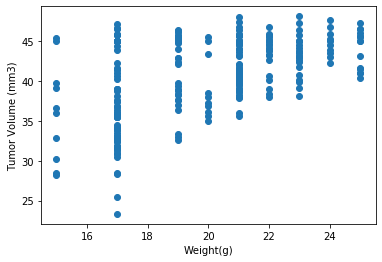

In [124]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume for mice treated with Capomulin')

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


Text(0.5, 1.0, 'Weight vs Tumor Volume for mice treated with Capomulin')

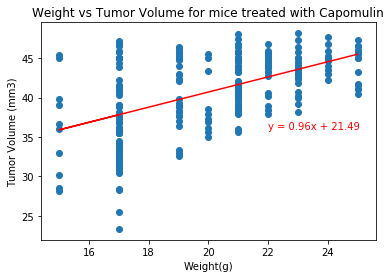

In [126]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
regress_values = capomulin['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capomulin['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(22,36),color="red")
plt.scatter(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])

plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume for mice treated with Capomulin')